In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
rng = core.GSLRandomNumberGenerator()

In [13]:
radius, D = 0.005, 10
dt = (2*radius)**2 / 6./D
duration = dt*10**5
Nm = 100
with species_attributes():
    A | {'D':str(D),'radius':str(radius)}
    B | {'D':'0.0','radius':str(radius)}
with reaction_rules():
    A + B > B | 100.
m=get_model()
w = spatiocyte.SpatiocyteWorld(Real3(1,1,1)*0.2,radius,rng=rng)

w.bind_to(m)
w.add_molecules(Species('A'),Nm)
w.add_molecules(Species('B'),1)
sim = spatiocyte.SpatiocyteSimulator(w)
obs = FixedIntervalNumberObserver(dt, ('A'))
sim.run(duration,obs)



In [14]:
print 4*3.14*2*radius*D
print w.size()

1.256
13728


(0, 0.04)

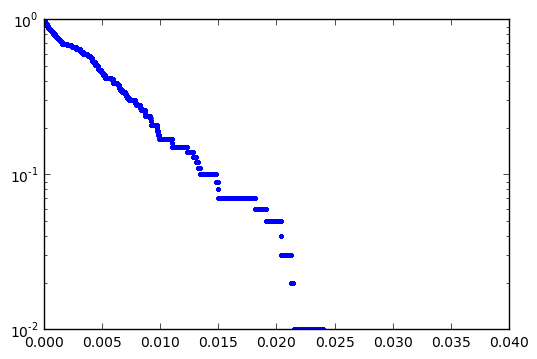

In [24]:
data = np.array(obs.data()).T
t=data[0]
na = data[1]
plt.semilogy(t,na/Nm,'.')
plt.xlim(0,0.04)
#viz.plot_number_observer(obs)
#viz.plot_number_observer(*observers, *[expfunc(p, N) for p in params], ylim=(N * 0.2, N), legend=False)

(array([ 18.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  3.33333333e-05,   9.10000000e-04,   1.78666667e-03,
          2.66333333e-03,   3.54000000e-03,   4.41666667e-03,
          5.29333333e-03,   6.17000000e-03,   7.04666667e-03,
          7.92333333e-03,   8.80000000e-03]),
 <a list of 10 Patch objects>)

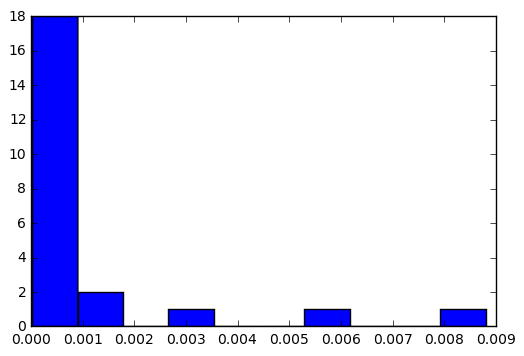

In [11]:
plt.hist(log)

In [5]:
12.*0.005

0.06